# Table of Contents
* [Introduction](#section-one)
* [Loading the data](#section-two)
* [Exploring and cleaning the data](#section-three)
* [Exploring the Data for Apples](#section-four)
    - [Domestic Apples](#subsection-one)
    - [Observations for Domestic Apples](#subsection-two)
    - [Imported Apples](#subsection-three)
    - [Observations for Imported Apples](#subsection-four)
* [Exploring the Data for Grapes](#section-five)
    - [Imported Grapes](#subsection-five)
    - [Observations for Imported Grapes](#subsection-six)
    - [Domestic Apples](#subsection-seven)
    - [Observations for Domestic Grapes](#subsection-eight)
* [Exploring the Data for Lettuce](#section-six)
    - [Domestic Lettuce](#subsection-9)
    - [Observations for Domestic Lettuce](#subsection-10)
    - [Imported Lettuce](#subsection-11)
    - [Observations for Imported Lettuce](#subsection-12)
* [Conclusion](#section-7)
* [References](#section-8)

<a id="section-one"></a>
# INTRODUCTION

The Pesticide Data Program is conducted annually by the EPA to measure pesticide levels in children's foods, such as apples, banannas, milk, tomatoes, and other foods.

Each year, samples are collected from participating states and are tested in state and federal laboratories for pesticide residues. Different foods are tested each year, and data is compiled and made accessible to the public [for free](http://www.ams.usda.gov/datasets/pdp)

In this kernel, we are going to look into some of the foods tested in 2016 and look for answers to questions such as:

- Does pesticide depend more on commodity or state?
- Do imported commodities have any difference in pesticide use compared to domestic commodities?
- Which samples violate EPA pesticide concentration?
- Are there differences in varieties of commodities?

The answers to these questions are discussed throughout the kernel in detail, and summarized at the end of the kernel.

Below is the commodity code for the foods in the dataset

**Commodity Code**

AC Apple Sauce

AP Apples

AZ Cranberries, Frozen

CA Cranberries

CH Cherries

CU Cucumbers

CZ Cherries, Frozen

EG Eggs

GB Green Beans

GF Grapefruit

GR Grapes

LT Lettuce

MK Milk

OG Oranges

OL Olives, Canned

PE Pears

PO Potatoes

SP Spinach

ST Strawberries

SW Sweet Potatoes

TC Tomatoes, Canned

TO Tomatoes

Concentration of pesticides is measured in parts per million (ppm)

<a id="section-two"></a>
#  Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/SampleResults 2017.csv
/kaggle/input/SampleResults 2018.csv
/kaggle/input/SampleResults 2016.csv


In [3]:
data_2016=pd.read_csv('/kaggle/input/SampleResults 2016.csv')

<a id="section-three"></a>
# Exploring and cleaning the data

In [4]:
data_2016.head()

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)
0,CA1610110001ACWA1P,AC,125,Diphenylamine (DPA),0.005,0.0020,M,NaN,NaN,O,PU,Original,NC,R,3,NaN,NaN,NaN,10.0
1,CA1610110001ACWA1P,AC,624,Tetrahydrophthalimide (THPI),0.042,0.0100,M,NaN,NaN,O,PU,Original,NC,R,3,NaN,NaN,NaN,25.0
2,CA1610110001ACWA1P,AC,666,Carbendazim (MBC),0.009,0.0010,M,NaN,NaN,O,PU,Original,NC,R,3,NaN,NaN,NaN,2.0
3,CA1610110001ACWA1P,AC,AHS,Flubendiamide,0.007,0.0035,M,NaN,P,O,PU,Original,NC,R,3,NaN,NaN,NaN,1.5
4,CA1610110001ACWA1P,AC,B22,Cyprodinil,0.007,0.0050,M,NaN,NaN,O,PU,Original,NC,R,3,NaN,NaN,NaN,1.7


For convenience, let's rename Pesticide Name to Pesticide_Name

In [5]:
data_2016=data_2016.rename(columns={'Pesticide Name':'Pesticide_Name'}) 

Let's see the amount of commodities in this dataset

In [6]:
data_2016['Commodity'].value_counts()

SP    5310
ST    4260
GR    3500
PE    3044
AP    2276
PO    2035
TO    2025
LT    1740
CU    1695
GF    1273
OG    1205
GB    1066
CZ     823
AC     725
SW     472
TC     210
CH     127
CA     110
OL      57
MK      18
AZ       8
EG       2
Name: Commodity, dtype: int64

There isn't much data to work with for dairy products. Only 2 samples of data for eggs and 18 samples for milk compared to 2276 samples of apples.

Let's focus on domestic samples for now. This is done by isolating the origin column to be to only values of 1. (1 means the sample is domestic, 2 means the sample is imported)

In [7]:
data_2016_usa=data_2016.loc[data_2016.Origin.isin(['1'])]
data_2016_usa.isnull().sum() 

Sample ID                  0
Commodity                  0
Pesticide Code             0
Pesticide_Name             0
Concentration              0
LOD                        0
pp_                        0
Annotate               21999
Quantitate             24154
Mean                       0
Commodity Type             0
Variety                 7292
Commodity Claim            0
Facility Type              0
Origin                     0
Country                25518
State                    814
Quantity               12469
EPA Tolerance (ppm)        0
dtype: int64

814 samples are missing from the dataset according to the State value. Let's drop those and focus only on samples with complete information

In [8]:
data_2016_usa = data_2016_usa[data_2016_usa['State'].notna()]
data_2016_usa.isnull().sum() 

Sample ID                  0
Commodity                  0
Pesticide Code             0
Pesticide_Name             0
Concentration              0
LOD                        0
pp_                        0
Annotate               21295
Quantitate             23405
Mean                       0
Commodity Type             0
Variety                 6859
Commodity Claim            0
Facility Type              0
Origin                     0
Country                24704
State                      0
Quantity               12093
EPA Tolerance (ppm)        0
dtype: int64

That's better. Now let's see the top pesticide used for each commodity and what state is associated with them

In [9]:
data_2016_usa.groupby('Commodity')['Pesticide_Name'].describe()

,count,unique,top,freq
Commodity,,,,
AC,658,22,Acetamiprid,134
AP,2173,46,Diphenylamine (DPA),419
AZ,5,2,Methoxyfenozide,4
CA,79,9,Fenbuconazole,29
CU,370,38,Propamocarb hydrochloride,43
CZ,504,29,Pyraclostrobin,50
EG,2,1,Cyromazine,2
GB,602,37,Azoxystrobin,99
GF,1180,19,Imazalil,517


In [10]:
data_2016_usa.groupby('Commodity')['State'].describe()

,count,unique,top,freq
Commodity,,,,
AC,658,17,TX,193
AP,2173,13,WA,1666
AZ,5,2,MA,4
CA,79,6,MA,45
CU,370,17,GA,92
CZ,504,12,CA,198
EG,2,2,PA,1
GB,602,18,FL,231
GF,1180,10,CA,461


In [11]:
data_2016_usa.groupby('State')['Pesticide_Name'].describe()

,count,unique,top,freq
State,,,,
AL,8,4,Imidacloprid,3
AR,136,39,Permethrin cis,8
AZ,111,47,Azoxystrobin,8
CA,12896,136,Imidacloprid,677
CO,126,30,Chlorpropham,30
CT,46,30,Thiabendazole,5
DE,1,1,Azoxystrobin,1
FL,1270,84,Imazalil,151
GA,164,33,Bifenthrin,25


From the tables above, it seems that not all states use the same pesticide for each commodity, more than 90% of the grape and lettuce samples are from California, yet the top pesticide used for them are Boscalid and Imidacloprid respectively.

Let's dig a little deeper. We know that the top pesticide used for apples is DPA, and that 76% of the samples are from Washington state. However, this does not tell us if there are differences in pesticides used depending on the variety of the apple.

Let's isolate the domestic data to just apples into its own dataset and work from there

<a id="section-four"></a>
# Exploring the Data for Apples
<a id="subsection-one"></a>
**Domestic Apples**

In [12]:
apple_data_usa=data_2016_usa.loc[data_2016_usa.Commodity=='AP',:] 
apple_data_usa['Variety'].value_counts(normalize=True)

Red Delicious           0.314669
Granny Smith            0.149931
Gala                    0.140676
Fuji                    0.130958
Golden Delicious        0.057381
Honeycrisp              0.029153
Empire                  0.020361
McIntosh                0.018973
Pink Lady               0.018510
Honey Crisp             0.013882
Cripps Pink             0.012957
Red                     0.007404
Macintosh               0.005090
Rome                    0.005090
Gala Washington         0.004627
Ruby Frost              0.004165
Red Delicious Ex-Fan    0.003239
Aztec Fuji              0.003239
Galas                   0.003239
Kanzi                   0.003239
Gala Apples             0.003239
Jonagold                0.002776
Unknown                 0.002776
Jazz                    0.002776
Ambrosia                0.002776
Macoun                  0.002776
Braeburn                0.002776
Wa EX Fancy             0.002314
Envy                    0.002314
Extra Fancy             0.002314
Acey Mac  

Let's isolate the data to just the top 5 rows since they contain 79% of the data

In [13]:
apple_data_usa=apple_data_usa.loc[apple_data_usa.Variety.isin(['Red Delicious', 'Granny Smith', 'Gala','Fuji','Golden Delicious'])]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [14]:
apple_data_usa.groupby('Variety')['Pesticide_Name'].value_counts(normalize=True)

Variety           Pesticide_Name                                     
Fuji              Diphenylamine (DPA)                                    0.197880
                  Thiabendazole                                          0.166078
                  Fludioxonil                                            0.095406
                  Chlorantraniliprole                                    0.074205
                  Acetamiprid                                            0.067138
                  Pyrimethanil                                           0.067138
                  Boscalid                                               0.056537
                  Pyraclostrobin                                         0.053004
                  Carbendazim (MBC)                                      0.049470
                  Trifloxystrobin                                        0.024735
                  Spirodiclofen                                          0.021201
                  Cyhalothri

We'll illustrate the pesticides for each variety of apples below:

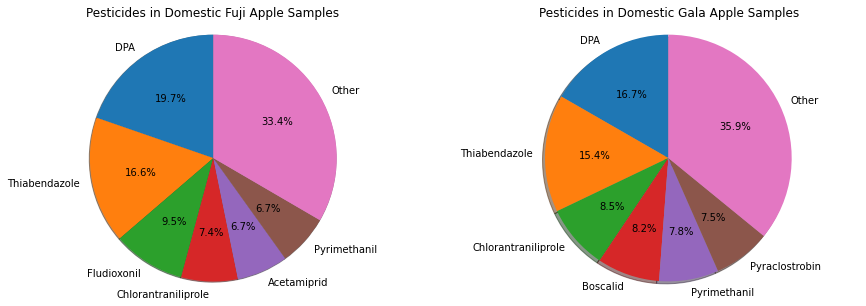

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'DPA', 'Thiabendazole', 'Fludioxonil', 'Chlorantraniliprole', 'Acetamiprid','Pyrimethanil','Other'
ax1.sizes = [19.7, 16.6, 9.5, 7.4, 6.7, 6.7, 33.4]
ax1.set_title("Pesticides in Domestic Fuji Apple Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=4)
ax1.axis('equal')

ax2.labels='DPA', 'Thiabendazole', 'Chlorantraniliprole', 'Boscalid', 'Pyrimethanil', 'Pyraclostrobin', 'Other'
ax2.sizes=[16.7,15.4,8.5,8.2,7.8,7.5,35.9]
ax2.set_title("Pesticides in Domestic Gala Apple Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(15,5)

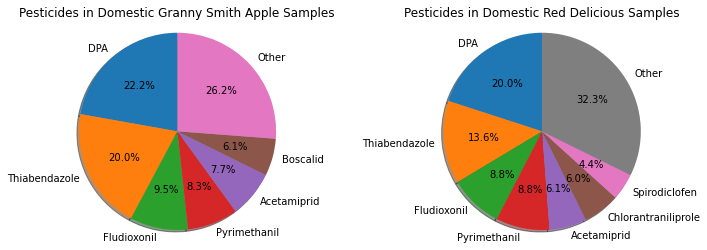

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'DPA', 'Thiabendazole', 'Fludioxonil', 'Pyrimethanil','Acetamiprid','Boscalid','Other'
ax1.sizes = [22.2, 20, 9.5, 8.3, 7.7, 6.1, 26.2]
ax1.set_title("Pesticides in Domestic Granny Smith Apple Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.labels = 'DPA', 'Thiabendazole', 'Fludioxonil', 'Pyrimethanil','Acetamiprid','Chlorantraniliprole','Spirodiclofen','Other'
ax2.sizes = [20, 13.6, 8.8, 8.8, 6.1, 6, 4.4, 32.3]
ax2.set_title("Pesticides in Domestic Red Delicious Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

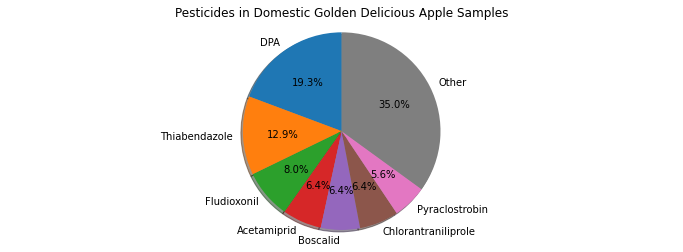

In [17]:
f, (ax) = plt.subplots()
ax.labels = 'DPA', 'Thiabendazole', 'Fludioxonil', 'Acetamiprid','Boscalid','Chlorantraniliprole','Pyraclostrobin','Other'
ax.sizes = [19.3, 12.9, 8, 6.4, 6.4, 6.4, 5.6, 35]
ax.set_title("Pesticides in Domestic Golden Delicious Apple Samples")
ax.pie(ax.sizes, labels=ax.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(12,4)

In [18]:
apple_data_usa.groupby('Variety')['State'].describe()

,count,unique,top,freq
Variety,,,,
Fuji,283,5,WA,254
Gala,304,7,WA,217
Golden Delicious,124,5,WA,88
Granny Smith,324,5,WA,293
Red Delicious,680,8,WA,502


In [19]:
apple_data_usa.groupby('State')['Pesticide_Name'].describe()

,count,unique,top,freq
State,,,,
CA,64,23,Diphenylamine (DPA),10
CT,10,9,Diphenylamine (DPA),2
ID,3,3,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",1
IL,24,11,Diphenylamine (DPA),6
MD,26,14,Tetrahydrophthalimide (THPI),3
MI,60,15,Diphenylamine (DPA),13
MN,6,6,Pyraclostrobin,1
NY,83,23,Tetrahydrophthalimide (THPI),11
OH,3,3,Thiabendazole,1


<a id="subsection-two"></a>
**Observations for Domestic Apples**

Pesticide use does not seem to be dependent on apple variety, all of the apples have DPA followed by Thiabendazole as the top used pesticides. Although there are a few differences in some states with pesticide use, most states used DPA across all apples. Note that for clarity, "Other" was categorized as all pesticides with <5% of samples

Let's see if any of the apple samples had pesticides that violated the EPA concentration limit

In [20]:
a1=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Diphenylamine (DPA)',:] 
a1[a1['Concentration']>=10.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


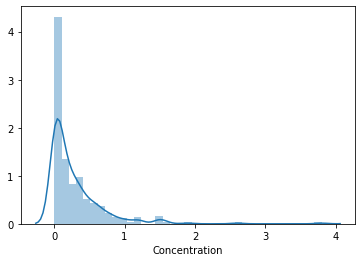

In [21]:
sns.distplot(a1['Concentration'])

In [22]:
a2=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Thiabendazole',:] 
a2[a2['Concentration']>=5.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


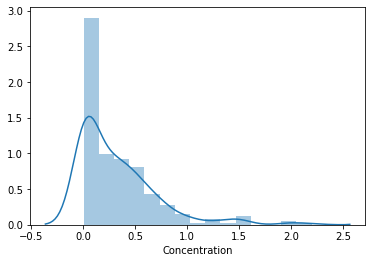

In [23]:
sns.distplot(a2['Concentration'])

In [24]:
a3=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Fludioxonil',:] 
a3[a3['Concentration']>=5.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


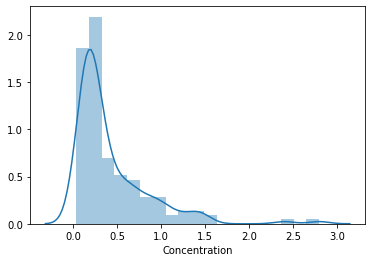

In [25]:
sns.distplot(a3['Concentration'])

In [26]:
a4=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Chlorantraniliprole',:] 
a4[a4['Concentration']>=1.2]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


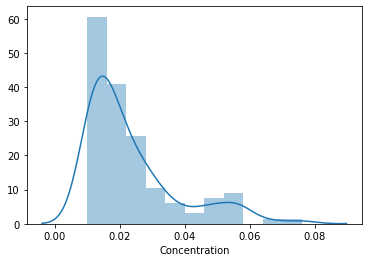

In [27]:
sns.distplot(a4['Concentration'])

In [28]:
a5=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Acetamiprid',:] 
a5[a5['Concentration']>=1.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


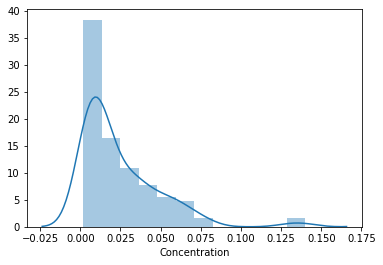

In [29]:
sns.distplot(a5['Concentration'])

In [30]:
a6=apple_data_usa.loc[apple_data_usa.Pesticide_Name=='Boscalid',:] 
a6[a6['Concentration']>=3.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


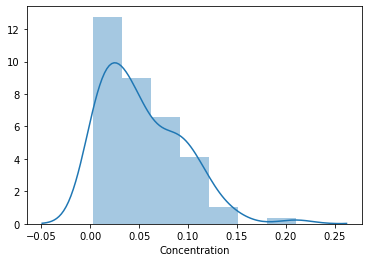

In [31]:
sns.distplot(a6['Concentration'])

It seems that none of the major pesticides violated EPA concentration limits for apples.

Let's dig into imported apple data

<a id="subsection-three"></a>
**Imported Apples**

In [32]:
data_2016_imports=data_2016.loc[data_2016.Origin.isin(['2'])]
apple_data_imports=data_2016_imports.loc[data_2016_imports.Commodity=='AP',:] 
apple_data_imports['Variety'].value_counts(normalize=True)

Gala                   0.297297
Royal Gala             0.189189
Fuji                   0.175676
Cripps Pink            0.067568
Gala Royal             0.054054
Braeburn               0.054054
Brookfield Gala        0.040541
Granny Smith           0.040541
Gala Apples            0.027027
Royal Gala (Tenroy)    0.027027
Prema17                0.013514
Delbush Tentation      0.013514
Name: Variety, dtype: float64

Let's look at 66% of the data with the first three rows

In [33]:
apple_data_imports=apple_data_imports.loc[apple_data_imports.Variety.isin(['Gala', 'Royal Gala', 'Fuji'])]
apple_data_imports.groupby('Variety')['Pesticide_Name'].value_counts(normalize=True)

Variety     Pesticide_Name              
Fuji        Acetamiprid                     0.230769
            Methoxyfenozide                 0.153846
            Thiabendazole                   0.153846
            Carbendazim (MBC)               0.076923
            Chlorantraniliprole             0.076923
            Pyrimethanil                    0.076923
            Tetrahydrophthalimide (THPI)    0.076923
            Thiacloprid                     0.076923
            Trifloxystrobin                 0.076923
Gala        Acetamiprid                     0.227273
            Pyrimethanil                    0.227273
            Thiacloprid                     0.181818
            Chlorantraniliprole             0.090909
            Spirodiclofen                   0.090909
            Trifloxystrobin                 0.090909
            Difenoconazole                  0.045455
            Methoxyfenozide                 0.045455
Royal Gala  Acetamiprid                     0.214286
     

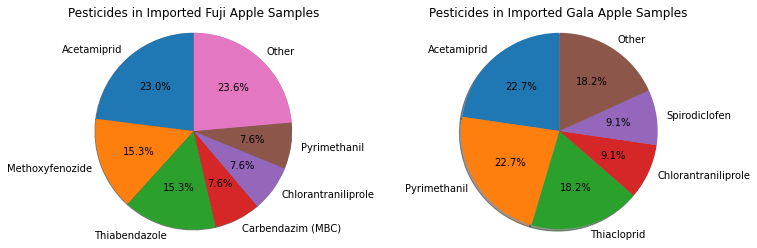

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Acetamiprid', 'Methoxyfenozide', 'Thiabendazole', 'Carbendazim (MBC)', 'Chlorantraniliprole','Pyrimethanil','Other'
ax1.sizes = [23, 15.3, 15.3, 7.6, 7.6, 7.6, 23.6]
ax1.set_title("Pesticides in Imported Fuji Apple Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=4)
ax1.axis('equal')

ax2.labels='Acetamiprid', 'Pyrimethanil', 'Thiacloprid', 'Chlorantraniliprole', 'Spirodiclofen', 'Other'
ax2.sizes=[22.7,22.7,18.2,9.1,9.1,18.2]
ax2.set_title("Pesticides in Imported Gala Apple Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

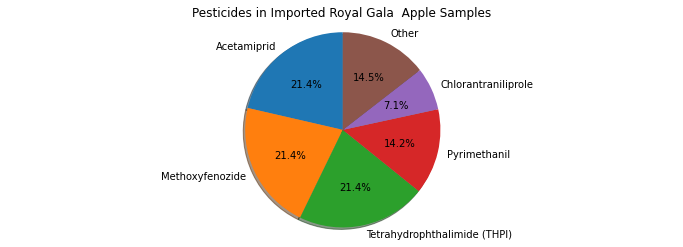

In [35]:
f, (ax) = plt.subplots()
ax.labels = 'Acetamiprid', 'Methoxyfenozide', 'Tetrahydrophthalimide (THPI)', 'Pyrimethanil','Chlorantraniliprole','Other'
ax.sizes = [21.4, 21.4, 21.4, 14.2, 7.1, 14.5]
ax.set_title("Pesticides in Imported Royal Gala  Apple Samples")
ax.pie(ax.sizes, labels=ax.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(12,4)

In [36]:
apple_data_imports.groupby('Country')['Pesticide_Name'].value_counts(normalize=True)

Country      Pesticide_Name              
Chile        Acetamiprid                     0.232558
             Pyrimethanil                    0.186047
             Thiacloprid                     0.139535
             Methoxyfenozide                 0.116279
             Chlorantraniliprole             0.093023
             Thiabendazole                   0.069767
             Trifloxystrobin                 0.069767
             Spirodiclofen                   0.046512
             Difenoconazole                  0.023256
             Tetrahydrophthalimide (THPI)    0.023256
China        Acetamiprid                     0.500000
             Carbendazim (MBC)               0.500000
New Zealand  Tetrahydrophthalimide (THPI)    0.750000
             Methoxyfenozide                 0.250000
Name: Pesticide_Name, dtype: float64

<a id="subsection-four"></a>
**Observations for Imported Apples**

For apples, we can see that imported samples have very different pesticide use than domestic samples. DPA is not used at all. Additionally, unlike the domestic samples, there is some difference in pesticide use between varieties. All samples have Acetamiprid as the most used pesticide, but only Gala apple samples were found with Spirodiclofen. Additionally, only Fuji samples were found with Carbendazim.

Let's see if imported samples violate EPA concentration limits

In [37]:
a7=apple_data_imports.loc[apple_data_imports.Pesticide_Name=='Acetamiprid',:] 
a7[a7['Concentration']>=1.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


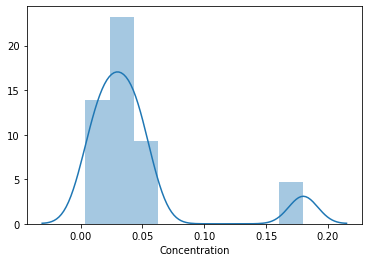

In [38]:
sns.distplot(a7['Concentration'])

In [39]:
a8=apple_data_imports.loc[apple_data_imports.Pesticide_Name=='Methoxyfenozide',:] 
a8[a8['Concentration']>=2.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


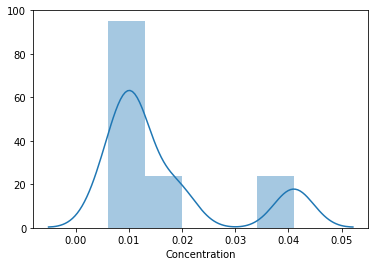

In [40]:
sns.distplot(a8['Concentration'])

In [41]:
a9=apple_data_imports.loc[apple_data_imports.Pesticide_Name=='Pyrimethanil',:] 
a9[a9['Concentration']>=15.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


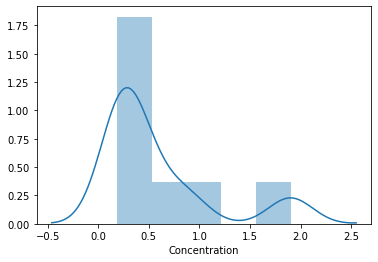

In [42]:
sns.distplot(a9['Concentration'])

There is not much imported apple data compared to domestic apple data, but there is enough data to conclude that pesticide use varies between domestic and imported samples.

Let's repeat this analyis with grapes

<a id="section-five"></a>
# Exploring the Data for Grapes

In [43]:
grape_data_usa=data_2016_usa.loc[data_2016_usa.Commodity=='GR',:] 
grape_data_usa.groupby('State')['Pesticide_Name'].value_counts()

State  Pesticide_Name     
CA     Boscalid               195
       Pyraclostrobin         168
       Cyprodinil             139
       Spirotetramat          106
       Quinoxyfen             104
       Tebuconazole            87
       Myclobutanil            77
       Trifloxystrobin         71
       Buprofezin              64
       Fenpropathrin           64
       Fenhexamid              61
       Methoxyfenozide         59
       Fludioxonil             50
       Tetraconazole           50
       Etoxazole               41
       Chlorantraniliprole     38
       Clothianidin            28
       Pyrimethanil            25
       Acetamiprid             24
       Flutriafol              18
       Difenoconazole          15
       Fenpyroximate           15
       Imidacloprid            11
       Bifenthrin              10
       Triflumizole             7
       Cypermethrin             6
       Flubendiamide            6
       Azoxystrobin             5
       Hexythiazox   

In [44]:
grape_data_imports=data_2016_imports.loc[data_2016_imports.Commodity=='GR',:] 
grape_data_imports['Country'].value_counts()

Chile              1374
Peru                274
Mexico              121
Unknown Country       7
Name: Country, dtype: int64

We'll work with imported samples first since there are only three countries. 

<a id="subsection-five"></a>
**Imported Grapes**

In [45]:
grape_data_imports=grape_data_imports[grape_data_imports.Country != 'Unknown Country']
grape_data_imports['Country'].value_counts()

Chile     1374
Peru       274
Mexico     121
Name: Country, dtype: int64

In [46]:
grape_data_imports['Variety'].value_counts()

Crimson Seedless        315
Thompson Seedless       229
Red Seedless            203
Flame Seedless          177
Green Seedless          169
Red Globe                62
Green                    44
Red                      41
Sugraone                 34
Autumn Royal             32
Sugarone                 27
Black Seedless           27
Thompson                 25
White Seedless           21
Crimson                  19
Flame                    17
Seedless                 13
Flame (Red Seedless)     12
Queen Rose               11
Unknown                  11
Ruby Seedless            11
Green Seedless Table     10
Red Seeded               10
Summer Royal              9
Sugraone Seedless         8
Red Seedless Table        8
Black                     8
Red, Seedless             8
Red Sugar One             8
Flame, Red Seedless       8
Thompsons Seedless        8
Red Flame Seedless        7
Timpson                   7
Red Table                 7
Sheegene / Timco          7
Sugraone; Green     

We'll only concern ourselves with the first 5 rows (63% of the data)

In [47]:
grape_data_imports=grape_data_imports.loc[grape_data_imports.Variety.isin(['Crimson Seedless', 'Thompson Seedless', 'Red Seedless','Flame Seedless','Green Seedless'])]
grape_data_imports.groupby('Variety')['Pesticide_Name'].value_counts(normalize=True)

Variety            Pesticide_Name      
Crimson Seedless   Boscalid                0.136508
                   Cyprodinil              0.114286
                   Fenhexamid              0.114286
                   Tebuconazole            0.092063
                   Difenoconazole          0.073016
                   Fludioxonil             0.053968
                   Pyrimethanil            0.050794
                   Pyraclostrobin          0.044444
                   Iprodione               0.038095
                   Acetamiprid             0.034921
                   Quinoxyfen              0.031746
                   Trifloxystrobin         0.031746
                   Chlorantraniliprole     0.025397
                   Imidacloprid            0.025397
                   Methoxyfenozide         0.019048
                   Myclobutanil            0.019048
                   Indoxacarb              0.015873
                   Spirotetramat           0.012698
                   Spino

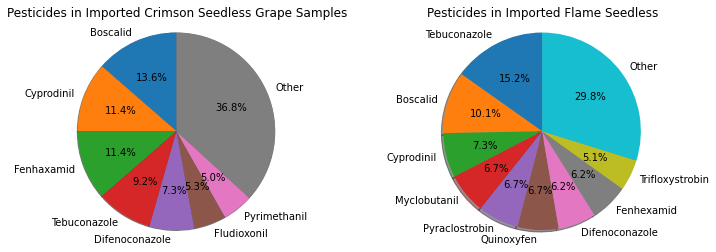

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Boscalid', 'Cyprodinil', 'Fenhaxamid', 'Tebuconazole', 'Difenoconazole','Fludioxonil',\
'Pyrimethanil','Other'
ax1.sizes = [13.6, 11.4, 11.4, 9.2, 7.3, 5.3, 5, 36.8]
ax1.set_title("Pesticides in Imported Crimson Seedless Grape Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=4)
ax1.axis('equal')

ax2.labels='Tebuconazole', 'Boscalid', 'Cyprodinil', 'Myclobutanil', 'Pyraclostrobin', 'Quinoxyfen',\
'Difenoconazole','Fenhexamid','Trifloxystrobin','Other'
ax2.sizes=[15.2,10.1,7.3,6.7,6.7,6.7,6.2,6.2,5.1,29.8]
ax2.set_title("Pesticides in Imported Flame Seedless")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

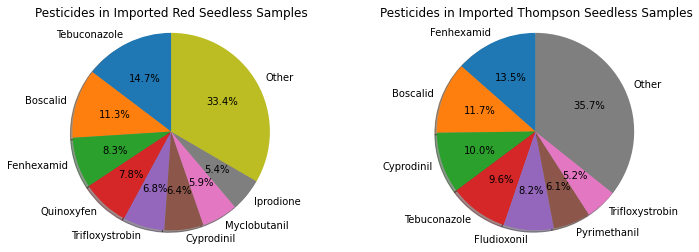

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Tebuconazole', 'Boscalid', 'Fenhexamid', 'Quinoxyfen','Trifloxystrobin','Cyprodinil',\
'Myclobutanil','Iprodione','Other'
ax1.sizes = [14.7, 11.3, 8.3, 7.8, 6.8, 6.4, 5.9, 5.4, 33.4]
ax1.set_title("Pesticides in Imported Red Seedless Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.labels = 'Fenhexamid', 'Boscalid', 'Cyprodinil', 'Tebuconazole','Fludioxonil','Pyrimethanil',\
'Trifloxystrobin','Other'
ax2.sizes = [13.5, 11.7, 10, 9.6, 8.2, 6.1, 5.2, 35.7]
ax2.set_title("Pesticides in Imported Thompson Seedless Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

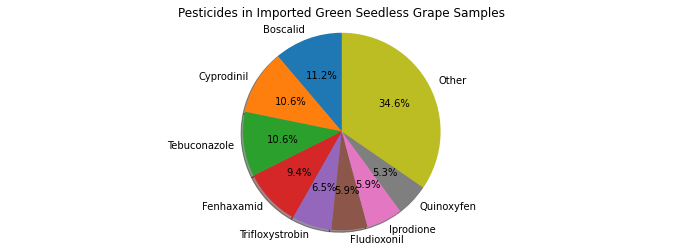

In [50]:
f, (ax) = plt.subplots()
ax.labels = 'Boscalid', 'Cyprodinil','Tebuconazole','Fenhaxamid','Trifloxystrobin','Fludioxonil','Iprodione',\
'Quinoxyfen','Other'
ax.sizes = [11.2, 10.6, 10.6, 9.4, 6.5, 5.9, 5.9, 5.3, 34.6]
ax.set_title("Pesticides in Imported Green Seedless Grape Samples")
ax.pie(ax.sizes, labels=ax.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(12,4)

<a id="subsection-six"></a>

**Observations for Imported Grapes**

Pesticide use for imported grape samples do show some difference among the varieties of samples. Crimson and green seedless samples have Boscalid as the top used pesticide, flame and red seedless samples have Tebuconazole as the top used pesticide. "Other" is reserved for pesticides that show less than 5% use.

In [51]:
grape_data_imports.groupby('Variety')['Country'].describe()

,count,unique,top,freq
Variety,,,,
Crimson Seedless,315,3,Chile,297
Flame Seedless,177,3,Chile,150
Green Seedless,169,3,Chile,146
Red Seedless,203,3,Chile,135
Thompson Seedless,229,2,Chile,216


In [52]:
grape_data_imports.groupby('Country')['Pesticide_Name'].describe()

,count,unique,top,freq
Country,,,,
Chile,944,34,Boscalid,115
Mexico,55,17,Tebuconazole,13
Peru,94,20,Boscalid,13


Although most of the samples originated from Chile, it seems that Tebuconazole is a more popular pesticide in Mexico.

Now let's see if any of the samples violated EPA limits:

In [53]:
g1=grape_data_imports.loc[grape_data_imports.Pesticide_Name=='Boscalid',:] 
g1[g1['Concentration']>=5.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


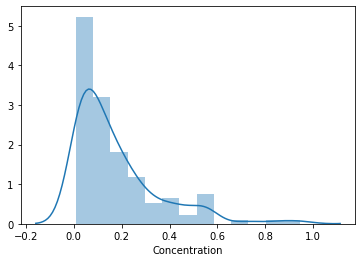

In [54]:
sns.distplot(g1['Concentration'])

In [55]:
g2=grape_data_imports.loc[grape_data_imports.Pesticide_Name=='Tebuconazole',:]
g2[g2['Concentration']>=5.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


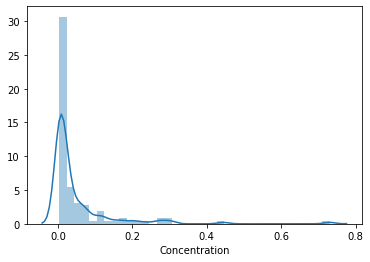

In [56]:
sns.distplot(g2['Concentration'])

In [57]:
g3=grape_data_imports.loc[grape_data_imports.Pesticide_Name=='Cyprodinil',:]
g3[g3['Concentration']>=3.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


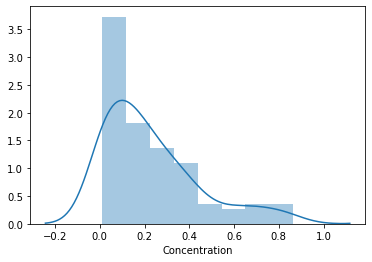

In [58]:
sns.distplot(g3['Concentration'])

In [59]:
g4=grape_data_imports.loc[grape_data_imports.Pesticide_Name=='Fenhexamid',:] 
g4[g4['Concentration']>=4.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


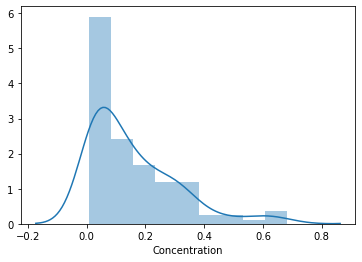

In [60]:
sns.distplot(g4['Concentration'])

It seems that none of the major pesticides violated EPA limits.

Now let's look at domestic grape data:

<a id="subsection-seven"></a>

**Domestic Grapes**

In [61]:
grape_data_usa['Variety'].value_counts(normalize=True)

Red Seedless            0.185093
Green Seedless          0.136646
Flame Seedless          0.088820
Autumn King             0.060248
Red                     0.045963
Scarlet Royal           0.041615
Crimson Seedless        0.022360
Scarlet Royal Red Se    0.021739
Scarlett Royal          0.020497
Holiday Seedless        0.019876
Green                   0.016149
Autumn King Seedless    0.013665
Thompson Seedless       0.012422
Autumn Royal            0.012422
Sweet Celebration       0.012422
Black Seedless          0.012422
Sugaone                 0.010559
Red Globe               0.009938
Autumn King Green       0.009317
Princess                0.009317
Sugraone                0.008696
Vintage Red Seedless    0.008696
Red Flame Seedless      0.007453
Green Seedless Grape    0.007453
Concord                 0.006832
Vintage Red             0.006211
Autumn King Table Gr    0.006211
Sugar Crunch            0.006211
Red Scarlet Royal       0.006211
Crimson Red Seedless    0.006211
Arra Black

For the sake of comparison, let's only focus on the same varieties of imported samples

In [62]:
grape_data_usa=grape_data_usa.loc[grape_data_usa.Variety.isin(['Red Seedless', 'Green Seedless', 'Flame Seedless','Thompson Seedless','Crimson Seedless'])]
grape_data_usa.groupby('Variety')['Pesticide_Name'].value_counts(normalize=True)

Variety            Pesticide_Name     
Crimson Seedless   Boscalid               0.166667
                   Pyraclostrobin         0.166667
                   Chlorantraniliprole    0.083333
                   Quinoxyfen             0.083333
                   Buprofezin             0.055556
                   Cyprodinil             0.055556
                   Etoxazole              0.055556
                   Fenpropathrin          0.055556
                   Myclobutanil           0.055556
                   Clothianidin           0.027778
                   Fenhexamid             0.027778
                   Imidacloprid           0.027778
                   Methoxyfenozide        0.027778
                   Spinosad               0.027778
                   Spirotetramat          0.027778
                   Tebuconazole           0.027778
                   Tetraconazole          0.027778
Flame Seedless     Boscalid               0.160839
                   Pyraclostrobin         0

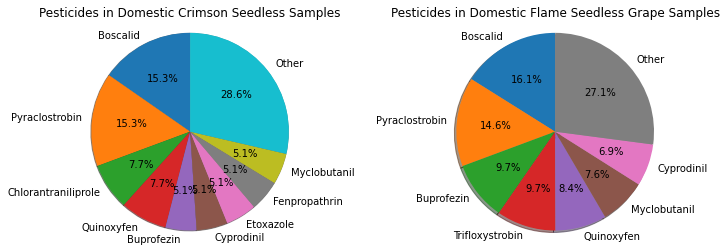

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Boscalid', 'Pyraclostrobin','Chlorantraniliprole','Quinoxyfen','Buprofezin',\
'Cyprodinil','Etoxazole','Fenpropathrin','Myclobutanil','Other'
ax1.sizes = [16.6, 16.6, 8.3, 8.3, 5.5, 5.5, 5.5, 5.5, 5.5, 31]
ax1.set_title("Pesticides in Domestic Crimson Seedless Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=4)
ax1.axis('equal')

ax2.labels='Boscalid', 'Pyraclostrobin', 'Buprofezin', 'Trifloxystrobin', 'Quinoxyfen', 'Myclobutanil',\
'Cyprodinil','Other'
ax2.sizes=[16.1,14.6,9.7,9.7,8.4,7.6, 6.9, 27.1]
ax2.set_title("Pesticides in Domestic Flame Seedless Grape Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')


fig = plt.gcf()
fig.set_size_inches(12,4)

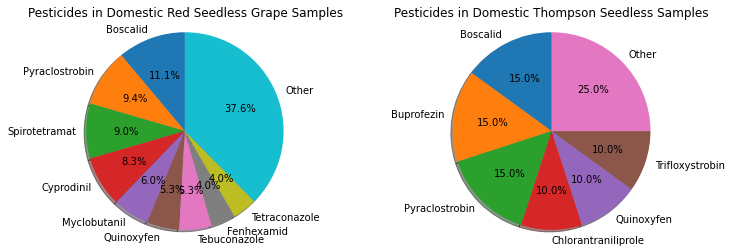

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Boscalid', 'Pyraclostrobin', 'Spirotetramat', 'Cyprodinil','Myclobutanil','Quinoxyfen',\
'Tebuconazole','Fenhexamid','Tetraconazole', 'Other'
ax1.sizes = [11.1,9.4, 9, 8.3, 6, 5.3, 5.3, 4, 4, 37.6]
ax1.set_title("Pesticides in Domestic Red Seedless Grape Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.labels = 'Boscalid', 'Buprofezin', 'Pyraclostrobin','Chlorantraniliprole','Quinoxyfen',\
'Trifloxystrobin','Other'
ax2.sizes = [15, 15, 15, 10, 10, 10, 25]
ax2.set_title("Pesticides in Domestic Thompson Seedless Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

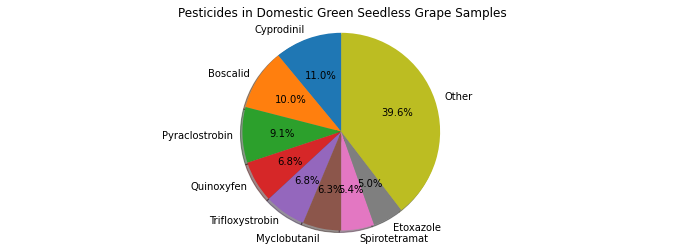

In [65]:
f, (ax) = plt.subplots()
ax.labels = 'Cyprodinil', 'Boscalid', 'Pyraclostrobin', 'Quinoxyfen','Trifloxystrobin','Myclobutanil',\
'Spirotetramat','Etoxazole', 'Other'
ax.sizes = [11, 10, 9.1, 6.8, 6.8, 6.3, 5.4, 5, 39.6]
ax.set_title("Pesticides in Domestic Green Seedless Grape Samples")
ax.pie(ax.sizes, labels=ax.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(12,4)

In [66]:
grape_data_imports.groupby('Variety')['Pesticide_Name'].describe()

,count,unique,top,freq
Variety,,,,
Crimson Seedless,315,31,Boscalid,43
Flame Seedless,177,28,Tebuconazole,27
Green Seedless,169,25,Boscalid,19
Red Seedless,203,31,Tebuconazole,30
Thompson Seedless,229,26,Fenhexamid,31


In [67]:
grape_data_usa.groupby('Variety')['Pesticide_Name'].describe()

,count,unique,top,freq
Variety,,,,
Crimson Seedless,36,17,Pyraclostrobin,6
Flame Seedless,143,21,Boscalid,23
Green Seedless,220,31,Cyprodinil,24
Red Seedless,298,36,Boscalid,33
Thompson Seedless,20,11,Boscalid,3


<a id="subsection-eight"></a>

**Observations for Domestic Grapes**

From the above data, we can see that Boscalid is most used in crimson seedless for both domestic and imported samples. Domestic flame seedless samples have a very low number of samples with Tebucanzole use (1.3%).

Domestic green seedless samples have a high number of Boscalid pesticide use next to Cyprodinil. Domestic Thompson samples have no use of Fenhexamid pesticide use.

Now let's see if the domestic grape samples violated EPA limits

In [68]:
g5=grape_data_usa.loc[grape_data_usa.Pesticide_Name=='Boscalid',:] 
g5[g5['Concentration']>=5.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


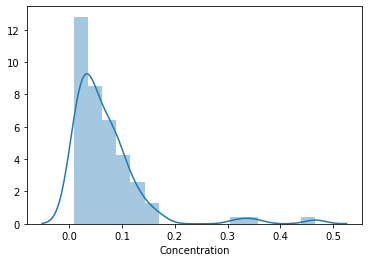

In [69]:
sns.distplot(g5['Concentration'])

In [70]:
g6=grape_data_usa.loc[grape_data_usa.Pesticide_Name=='Cyprodinil',:] 
g6[g6['Concentration']>=3.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


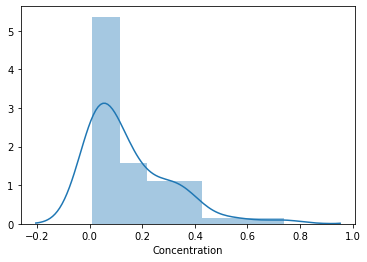

In [71]:
sns.distplot(g6['Concentration'])

In [72]:
g7=grape_data_usa.loc[grape_data_usa.Pesticide_Name=='Pyraclostrobin',:] 
g7[g7['Concentration']>=2.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


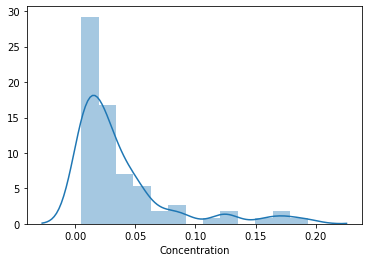

In [73]:
sns.distplot(g7['Concentration'])

In [74]:
g8=grape_data_usa.loc[grape_data_usa.Pesticide_Name=='Quinoxyfen',:] 
g8[g8['Concentration']>=2.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


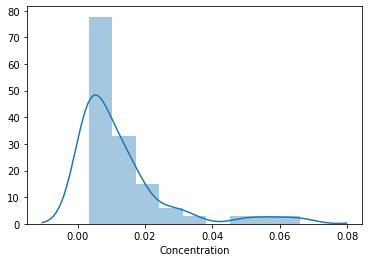

In [75]:
sns.distplot(g8['Concentration'])

In [76]:
g9=grape_data_usa.loc[grape_data_usa.Pesticide_Name=='Spirotetramat',:] 
g9[g9['Concentration']>=1.3]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


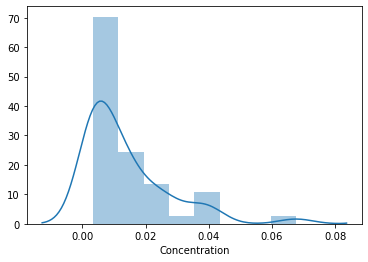

In [77]:
sns.distplot(g9['Concentration'])

It seems that the samples in general have a good record of meeting EPA limits

Let's analyze one more set of commodity. We'll look into lettuce since the first two samples were fruits, we can see how the data compares to vegetables

<a id="section-six"></a>
# Exploring the Data for Lettuce

<a id="subsection-9"></a>
**Domestic Lettuce**

In [78]:
lettuce_data_usa=data_2016_usa.loc[data_2016_usa.Commodity=='LT',:]
lettuce_data_usa['Variety'].value_counts()

Iceberg                 538
Romaine                 413
Green Leaf              349
Head                     75
Red Leaf                 72
Redleaf                  24
Butter                   21
Iceberg Head             20
Iceberg Lettuce          17
UNK                      11
Romaine Lettuce           9
Head, Iceberg             9
Loose Green Leaf          8
Head Lettuce              8
Burgundy Leaf             6
Red Romaine               6
Leaf                      6
Iceberg (Head)            5
Iceberg, Head             5
Boston                    4
Heads                     4
Green Leaf, Trimmed       3
Green Leaf Lettuce        3
Red Leaf Lettuce          3
Boston/Butter Head        2
Butter Lettuce            2
Jumbo Iceburg             2
Iceberg Head Lettuce      2
Leaf, Green               2
Romaine Lettuce Head      2
Iceberg - Head            1
Iceberg Lettuce 4061      1
Cello                     1
None                      1
Iceberg Heads             1
Wrapped Lettuce     

We'll discard the head lettuce since it can be considered to be a multiple different varieties, and only focus on iceberg, romaine, green leaf, and red leaf lettuce samples

In [79]:
lettuce_data_usa=lettuce_data_usa.loc[lettuce_data_usa.Variety.isin(['Iceberg', 'Romaine', 'Green Leaf','Red Leaf'])]
lettuce_data_usa.groupby('Variety')['Pesticide_Name'].value_counts(normalize=True)

Variety     Pesticide_Name                                     
Green Leaf  Imidacloprid                                           0.103152
            Cyhalothrin, Total (Cyhalothrin-L + R157836 epimer)    0.071633
            Mandipropamid                                          0.068768
            Spinetoram                                             0.065903
            DCPA                                                   0.063037
            Propamocarb hydrochloride                              0.060172
            Dimethomorph                                           0.054441
            Fenamidone                                             0.054441
            Permethrin cis                                         0.051576
            Permethrin trans                                       0.042980
            Thiamethoxam                                           0.042980
            Boscalid                                               0.037249
            Flonicamid  

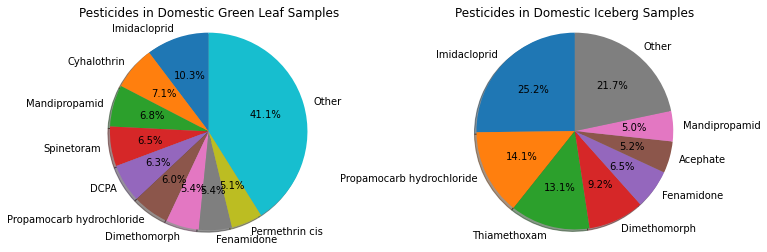

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Imidacloprid', 'Cyhalothrin', 'Mandipropamid', 'Spinetoram','DCPA','Propamocarb hydrochloride',\
'Dimethomorph','Fenamidone','Permethrin cis', 'Other'
ax1.sizes = [10.3, 7.1, 6.8, 6.5, 6.3, 6, 5.4, 5.4, 5.1, 41.1]
ax1.set_title("Pesticides in Domestic Green Leaf Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.labels = 'Imidacloprid','Propamocarb hydrochloride','Thiamethoxam','Dimethomorph','Fenamidone','Acephate',\
'Mandipropamid','Other'
ax2.sizes = [25.2, 14.1, 13.1, 9.2, 6.5, 5.2, 5.0 ,21.7]
ax2.set_title("Pesticides in Domestic Iceberg Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

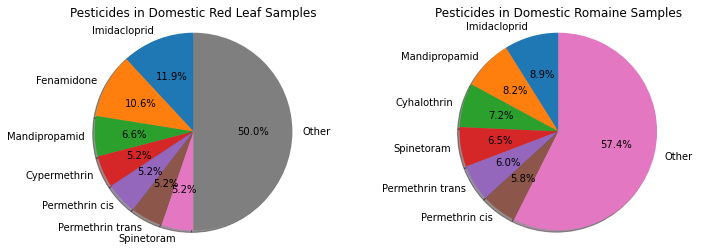

In [81]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.labels = 'Imidacloprid','Fenamidone','Mandipropamid','Cypermethrin','Permethrin cis','Permethrin trans',\
'Spinetoram','Other'
ax1.sizes = [12.5, 11.1, 6.9, 5.5, 5.5, 5.5, 5.5, 52.5]
ax1.set_title("Pesticides in Domestic Red Leaf Samples")
ax1.pie(ax1.sizes, labels=ax1.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

ax2.labels = 'Imidacloprid', 'Mandipropamid', 'Cyhalothrin', 'Spinetoram','Permethrin trans','Permethrin cis',\
'Other'
ax2.sizes = [8.9, 8.2, 7.2, 6.5, 6.0, 5.8,57.4]
ax2.set_title("Pesticides in Domestic Romaine Samples")
ax2.pie(ax2.sizes, labels=ax2.labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

fig = plt.gcf()
fig.set_size_inches(12,4)

In [82]:
lettuce_data_usa.groupby('State')['Pesticide_Name'].describe()

,count,unique,top,freq
State,,,,
AZ,14,12,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",2
CA,1261,48,Imidacloprid,197
CO,6,5,Imidacloprid,2
FL,2,2,Thiamethoxam,1
IL,1,1,Propamocarb hydrochloride,1
MD,7,6,Imidacloprid,2
MI,7,7,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",1
NJ,1,1,DCPA,1
NM,3,2,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",2


In [83]:
grape_data_usa.groupby('State')['Pesticide_Name'].describe()

,count,unique,top,freq
State,,,,
CA,656,38,Boscalid,80
CT,2,2,Cyprodinil,1
FL,3,3,Myclobutanil,1
MD,3,3,Quinoxyfen,1
MI,5,5,Pyraclostrobin,1
MN,19,13,Fenpropathrin,2
TX,29,18,Trifloxystrobin,3


<a id="subsection-10"></a>

**Observations for Domestic Lettuce**

It's interesting to see as mentioned in the beginning of this kernel that altough California has the highest amount of samples for both grapes and lettuce, the pesticide use is quite different for both products, leading that pesticide use is more dependent on commodity than state. As for varieties of lettuce, it is similar to domestic apples in that there is not much difference in pesticide use, with Imidacloprid being the most used pesticide across all samples. 

Now let's finally see if any lettuce samples violated EPA limits:

In [84]:
l1=lettuce_data_usa.loc[lettuce_data_usa.Pesticide_Name=='Imidacloprid',:] 
l1[l1['Concentration']>=3.5]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


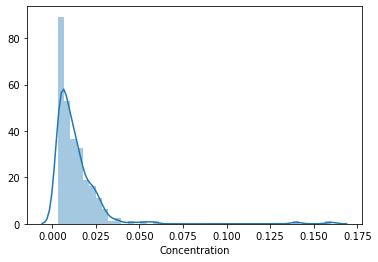

In [85]:
sns.distplot(l1['Concentration'])

In [86]:
l2=lettuce_data_usa.loc[lettuce_data_usa.Pesticide_Name=='Cyhalothrin, Total (Cyhalothrin-L + R157836 epimer)',:] 
l2[l2['Concentration']>=2.0]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


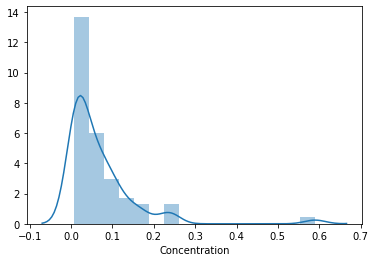

In [87]:
sns.distplot(l2['Concentration'])

In [88]:
l3=lettuce_data_usa.loc[lettuce_data_usa.Pesticide_Name=='Mandipropamid',:] 
l3[l3['Concentration']>=20]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


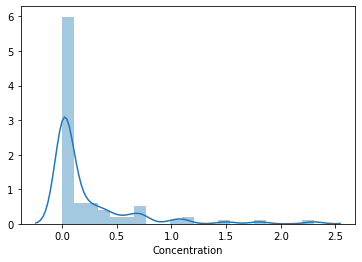

In [89]:
sns.distplot(l3['Concentration'])

In [90]:
l4=lettuce_data_usa.loc[lettuce_data_usa.Pesticide_Name=='Fenamidone',:] 
l4[l4['Concentration']>=60]

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)


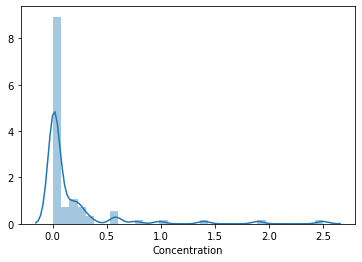

In [91]:
sns.distplot(l4['Concentration'])

Let's look at imported lettuce data

<a id="subsection-11"></a>
**Imported Lettuce**

In [92]:
lettuce_data_imports=data_2016_imports.loc[data_2016_imports.Commodity=='LT',:] 
lettuce_data_imports['Country'].value_counts()

Mexico    28
Canada     4
Name: Country, dtype: int64

Not many samples, but let's dig in anyway to see if there is anything noteworthy

In [93]:
lettuce_data_imports['Variety'].value_counts()

Romaine             27
Red Leaf Lettuce     1
Iceberg              1
Head                 1
Boston               1
Name: Variety, dtype: int64

In [94]:
lettuce_data_imports

,Sample ID,Commodity,Pesticide Code,Pesticide_Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)
12066,CO1605090012LTWA1,LT,AGX,Mandipropamid,0.003,0.0020,M,NaN,NaN,O,FR,Iceberg,NC,D,2,Mexico,NaN,4.0,20
12211,FL1608080062LTWA1P,LT,AGX,Mandipropamid,0.410,0.0020,M,NaN,NaN,O,FR,Boston,NC,R,2,Canada,NaN,4.0,20
12256,FL1610170076LTWA1,LT,ABC,Spinosad A,0.005,0.0030,M,NaN,NaN,O,FR,Red Leaf Lettuce,PO,L,2,Canada,NaN,7.0,8.0
12726,NY1606070068LTWA1,LT,626,Iprodione,0.400,0.0400,M,NaN,NaN,O,FR,Romaine,NC,T,2,Canada,NaN,3.0,25.0
12786,NY1608020265LTWA1,LT,AGW,Chlorantraniliprole,0.012,0.0100,M,NaN,NaN,O,FR,Head,NC,D,2,Canada,NaN,4.0,13
13045,TX1602010105LTWA1P,LT,AFU,Propamocarb hydrochloride,0.003,0.0020,M,NaN,NaN,O,FR,NaN,NC,R,2,Mexico,NaN,3.0,90
13046,TX1602010201LTWA1,LT,AFU,Propamocarb hydrochloride,1.500,0.0020,M,NaN,NaN,O,FR,Romaine,NC,D,2,Mexico,NaN,4.0,90
13047,TX1602010201LTWA1,LT,AHS,Flubendiamide,0.014,0.0035,M,NaN,NaN,O,FR,Romaine,NC,D,2,Mexico,NaN,4.0,11
13048,TX1602010201LTWA1,LT,967,Imidacloprid,0.009,0.0030,M,NaN,NaN,O,FR,Romaine,NC,D,2,Mexico,NaN,4.0,3.5
13049,TX1602010201LTWA1,LT,222,Permethrin cis,0.170,0.0100,M,NaN,NaN,O,FR,Romaine,NC,D,2,Mexico,NaN,4.0,20


It seems that none of the samples violated EPA limits. Let's only focus on romaine samples

In [95]:
lettuce_data_imports=lettuce_data_imports.loc[lettuce_data_imports.Variety.isin(['Romaine'])]
lettuce_data_imports.groupby('Variety')['Pesticide_Name'].value_counts()

Variety  Pesticide_Name                                     
Romaine  Boscalid                                               2
         Cyhalothrin, Total (Cyhalothrin-L + R157836 epimer)    2
         Dimethomorph                                           2
         Fenamidone                                             2
         Flubendiamide                                          2
         Imidacloprid                                           2
         Permethrin cis                                         2
         Permethrin trans                                       2
         Propamocarb hydrochloride                              2
         Cymoxanil                                              1
         DCPA                                                   1
         Fluopicolide                                           1
         Iprodione                                              1
         Mandipropamid                                          1
         Methom

<a id="subsection-12"></a>
**Observations for Imported Lettuce**

Seems to be an even number of samples with the same kinds of pesticides as domestic samlpes. A larger sample size may show more difference as it has with apples and grapes

<a id="section-7"></a>

# Conclusion

The purpose of this study was to look into differences of pesticide use among commodities in the EPA Pesticide Data Program.

The questions at the start of the kernel were presented as:

1. Does pesticide depend more on commodity or state?

2. Do imported commodities have any difference in pesticide use compared to domestic commodities?

3. Which samples violate EPA pesticide concentration?

4. Are there differences in varieties of commodities?

and the answers that were discovered were:

1. Pesticide use depends more on commodity. Apples and grapes are both fruits, but have different pesticide use. California had the higest number of samples for grapes and lettuce, but both have very different pesticide use, with the top pesticide for grapes being Boscalid and the top pesticide for lettuce being Imidacloprid.

2. Imported commodities do have difference in pesticide use, domestic apples have DPA as the most used pesticide whereas none of the imported apple samples contain DPA.

3. None of the samples in this study violated EPA concentration limits of pesticides

4. There is some slight difference in pesticide use among varieties of commodities. Domestic iceberg lettuce samples have a higher use of Propamocarb hydrochloride than other lettuce samples. Domestic red seedless grapes have a higer use of Spirotetramat than other grape samples. Domestic gala apples contain higher use of Chlorantraniliprole than other apple samples


The data is publicy available above and listed below in the references. Perhaps it would be interesting in a future study to analyze data across multiple years to see if there are any differences in pesticide use.

<a id="section-one"></a>
# References

1. [PDP Database](http://www.ams.usda.gov/datasets/pdp/pdpdata)

2. [Database search for commodities](http://apps.ams.usda.gov/pdp)

3. [Database search guide](http://www.ams.usda.gov/sites/default/files/media/PDPSearchAppUserGuide.pdf)